<h1> Data Analytics Project </h1>

<h3> United Kingdom Road Accident Data Analysis </h3>
<h3> Inclusive Years: 2019 - 2022 </h3>
<h5> Analyst:Francis Raven Salamo</h5>


In [84]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

In [86]:
accident = pd.read_csv('jup\\accident data.csv')

In [87]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05/06/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02/07/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26/08/2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16/08/2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03/09/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18/02/2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21/02/2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23/02/2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23/02/2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


<h1> Data Preparation </h1>

In [88]:
accident.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [89]:
accident.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


In [90]:
accident['Accident_Severity'] = accident['Accident_Severity'].astype('category')

In [91]:
accident['Accident_Severity'].value_counts()

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

<h1> Converting Object to DateTime Data Type </h1>

In [92]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True, errors = 'coerce')

In [93]:
accident.dtypes
# accident['Accident Date']

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area                object
Weather_Conditions                 object
Vehicle_Type                       object
dtype: object

<h1> Data Cleansing </h1>
<h3>Filling out null values</h3>

In [94]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [95]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mode()[0])
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mode()[0])  # Corrected here
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna('unknown surface condition')
accident['Road_Type'] = accident['Road_Type'].fillna('unaccounted')
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna('unaccounted')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])

In [96]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

In [97]:
accident['Index'] = accident['Index'].astype('category')
accident['Light_Conditions'] = accident['Light_Conditions'].astype('category')
accident['District Area'] = accident['District Area'].astype('category')
accident['Number_of_Casualties'] = accident['Number_of_Casualties'].astype('category')
accident['Number_of_Vehicles'] = accident['Number_of_Vehicles'].astype('category')
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].astype('category')
accident['Road_Type'] = accident['Road_Type'].astype('category')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].astype('category')
accident['Vehicle_Type'] = accident['Vehicle_Type'].astype('category')
accident['Weather_Conditions'] = accident['Weather_Conditions'].astype('category')

In [98]:
accident.dtypes

Index                            category
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                 category
District Area                    category
Longitude                         float64
Number_of_Casualties             category
Number_of_Vehicles               category
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
dtype: object

<h1>Converting object to DateTime Data Type</h1>

In [99]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True, errors = 'coerce')

In [100]:
accident.dtypes

Index                            category
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                 category
District Area                    category
Longitude                         float64
Number_of_Casualties             category
Number_of_Vehicles               category
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
dtype: object

<h1> Insight 1 </h1>
<h3>  Are slight accidents more common on dual carriageways compared to other road types? </h3>

In [101]:
accidents = accident[(accident['Road_Type'] == 'Dual carriageway') &  
                     (accident['Accident_Severity'] == 'Slight')]
accidents

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
105,200701BS70092,Slight,2019-02-24,51.501749,Darkness - lights lit,Westminster,-0.160555,2,2,Dry,Dual carriageway,Urban,Fine no high winds,Car
124,200701BS70118,Slight,2019-03-08,51.498154,Daylight,Kensington and Chelsea,-0.166463,1,2,Dry,Dual carriageway,Urban,Fine no high winds,Taxi/Private hire car
128,200701BS70124,Slight,2019-03-17,51.494469,Daylight,Kensington and Chelsea,-0.195567,1,3,Dry,Dual carriageway,Urban,Fine no high winds,Motorcycle 50cc and under
133,200701BS70129,Slight,2019-03-25,51.507806,Daylight,Kensington and Chelsea,-0.203254,1,1,Dry,Dual carriageway,Urban,Fine no high winds,Car
150,200701BS70150,Slight,2019-03-30,51.498838,Darkness - lights lit,Kensington and Chelsea,-0.198997,1,2,Dry,Dual carriageway,Urban,Fine no high winds,Motorcycle 125cc and under
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660494,201091NH05258,Slight,2022-10-05,58.231643,Darkness - lights lit,Western Isles,-6.390280,1,2,Wet or damp,Dual carriageway,Rural,Fine no high winds,Car
660537,201091NJ05028,Slight,2022-04-15,58.322497,Daylight,Highland,-3.198929,1,1,Dry,Dual carriageway,Rural,Fine no high winds,Car
660625,201091NK06094,Slight,2022-12-05,58.997002,Darkness - no lighting,Orkney Islands,-3.080958,1,1,Frost or ice,Dual carriageway,Rural,Other,Goods over 3.5t. and under 7.5t
660650,201091NL06664,Slight,2022-11-30,60.250124,Daylight,Shetland Islands,-1.225334,1,2,Snow,Dual carriageway,Rural,Snowing + high winds,Van / Goods 3.5 tonnes mgw or under


To determine if slight accidents are more common on dual carriageways compared to other road types, we would need to compare <p>the number of slight accidents on dual carriageways to the number of slight accidents on other road types (such as single carriageways, motorways, etc.).</p>

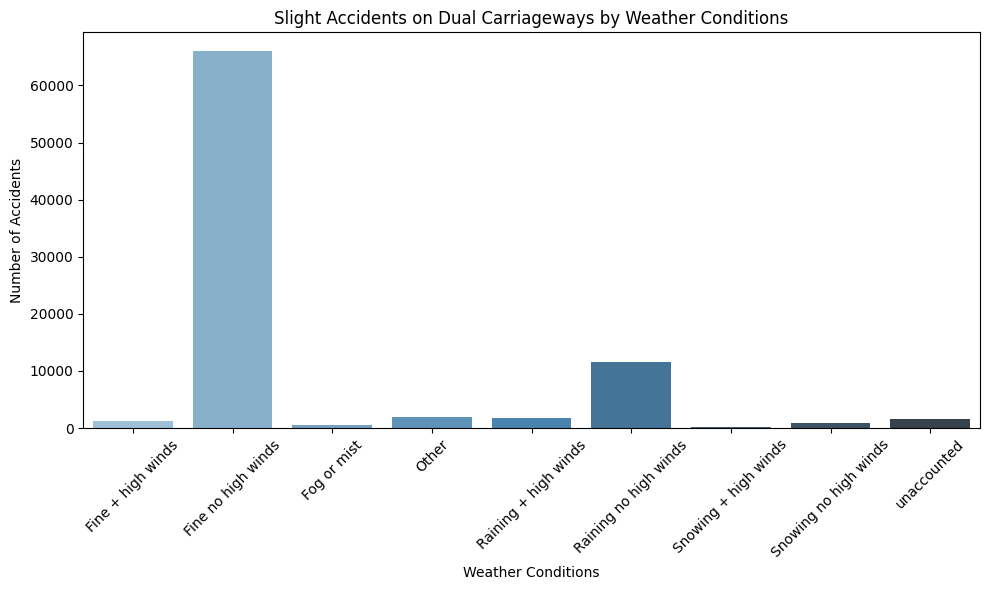

In [102]:
accidents = accident[(accident['Road_Type'] == 'Dual carriageway') &  
                     (accident['Accident_Severity'] == 'Slight')]

accident_count = accidents['Weather_Conditions'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=accident_count.index, y=accident_count.values, palette="Blues_d")
plt.title('Slight Accidents on Dual Carriageways by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h1> Insight 2 </h1>
<h3> How do different light conditions and road surface conditions impact accident severity? </h3>

In [103]:
accidents = accident.groupby(['Accident_Severity', 'Light_Conditions', 'Road_Surface_Conditions']).size()
print(accidents)

Accident_Severity  Light_Conditions             Road_Surface_Conditions  
Fatal              Darkness - lighting unknown  Dry                              43
                                                Flood over 3cm. deep              1
                                                Frost or ice                      1
                                                Snow                              0
                                                Wet or damp                      23
                                                                              ...  
Slight             Daylight                     Flood over 3cm. deep            492
                                                Frost or ice                   9103
                                                Snow                           3096
                                                Wet or damp                  100122
                                                unknown surface condition       475
Le

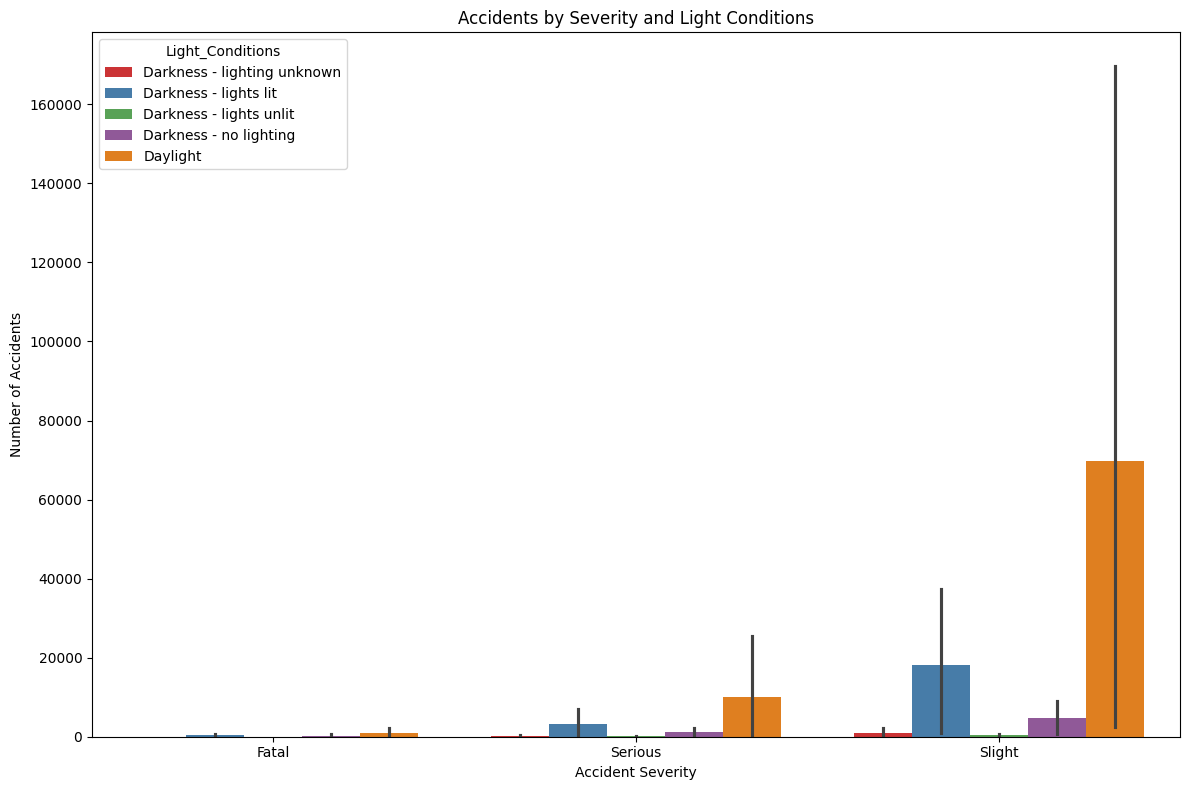

In [104]:
accidents = accident.groupby(['Accident_Severity', 'Light_Conditions', 'Road_Surface_Conditions']).size().reset_index(name='Count')

plt.figure(figsize=(12,8))
sns.barplot(x='Accident_Severity', y='Count', hue='Light_Conditions', data=accidents, palette='Set1')
plt.title('Accidents by Severity and Light Conditions')
plt.xlabel('Accident Severity')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

<h1> Insight 3 </h1>
<h3> How does accident severity vary by different types of vehicles involved? </h3>

In [105]:
accidents = accident.groupby(['Accident_Severity', 'Vehicle_Type']).size()  
print(accidents)

Accident_Severity  Vehicle_Type                         
Fatal              Agricultural vehicle                         21
                   Bus or coach (17 or more pass seats)        325
                   Car                                        6577
                   Data missing or out of range                  0
                   Goods 7.5 tonnes mgw and over               216
                   Goods over 3.5t. and under 7.5t              67
                   Minibus (8 - 16 passenger seats)             29
                   Motorcycle 125cc and under                  189
                   Motorcycle 50cc and under                    95
                   Motorcycle over 125cc and up to 500cc       105
                   Motorcycle over 500cc                       339
                   Other vehicle                                70
                   Pedal cycle                                   6
                   Ridden horse                                  0
     

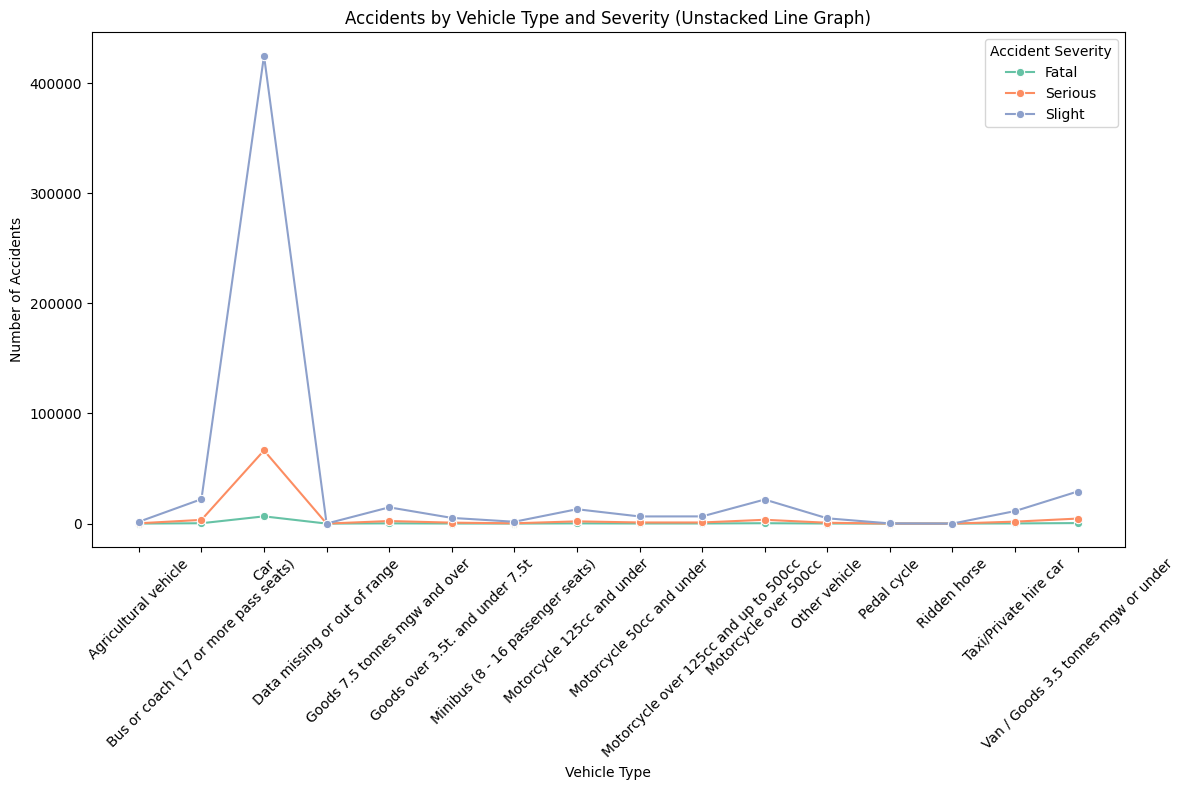

In [106]:
accidents = accident.groupby(['Accident_Severity', 'Vehicle_Type']).size().reset_index(name='Count')

plt.figure(figsize=(12,8))

sns.lineplot(data=accidents, x='Vehicle_Type', y='Count', hue='Accident_Severity', marker='o', palette='Set2')

plt.title('Accidents by Vehicle Type and Severity (Unstacked Line Graph)')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Accident Severity')
plt.show()

<h1>Insight 4</h1>
<h3>Which road type has the highest number of severe accidents? Do highways or intersections contribute more to accident severity?</h3>

In [107]:
accidents_by_road_severity = accident.groupby(['Road_Type', 'Accident_Severity']).size().reset_index(name='Accident_Count')
accidents_by_road_severity

,Road_Type,Accident_Severity,Accident_Count
0,Dual carriageway,Fatal,1815
1,Dual carriageway,Serious,11746
2,Dual carriageway,Slight,85863
3,One way street,Fatal,95
4,One way street,Serious,1655
5,One way street,Slight,11809
6,Roundabout,Fatal,142
7,Roundabout,Serious,3665
8,Roundabout,Slight,40185
9,Single carriageway,Fatal,6527


<Figure size 1200x600 with 0 Axes>

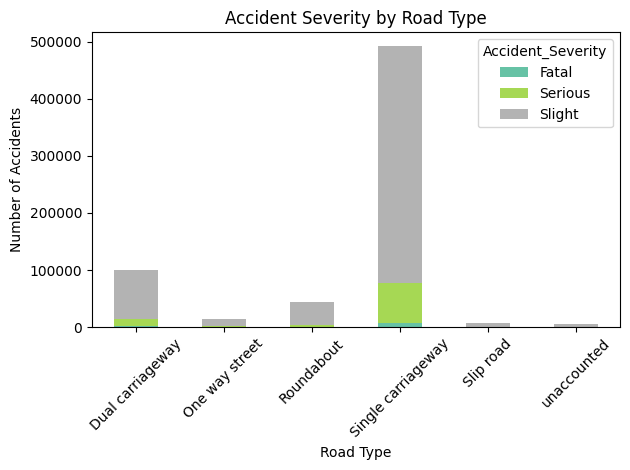

In [108]:
accidents_by_road_severity = accident.groupby(['Road_Type', 'Accident_Severity']).size().reset_index(name='Accident_Count')

plt.figure(figsize=(12,6))
accidents_by_road_severity.pivot_table(index='Road_Type', columns='Accident_Severity', values='Accident_Count', aggfunc='sum').plot(kind='bar', stacked=True, colormap='Set2')

plt.title('Accident Severity by Road Type')
plt.xlabel('Road Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h1>Insight 5</h1>
<h3>Are certain road types (e.g., single carriageway vs. motorways) more prone to severe accidents in rural or urban areas?<h3>

In [109]:
road_type_accidents = accident.groupby(['Urban_or_Rural_Area', 'Road_Type', 'Accident_Severity']).size().unstack().fillna(0)
road_type_accidents

Accident_Severity                       Fatal  Serious  Slight
Urban_or_Rural_Area Road_Type                                 
Rural               Dual carriageway     1201     6005   41509
                    One way street          8      154    1031
                    Roundabout             62     1436   14047
                    Single carriageway   4276    29168  134566
                    Slip road              36      400    3858
                    unaccounted            18      149    1066
Unallocated         Dual carriageway        0        0       1
                    One way street          0        0       0
                    Roundabout              0        0       1
                    Single carriageway      0        1       8
                    Slip road               0        0       0
                    unaccounted             0        0       0
Urban               Dual carriageway      614     5741   44353
                    One way street         87     1501   10778
                    Roundabout             80     2229   26137
                    Single carriageway   2251    40890  280983
                    Slip road              13      211    2523
                    unaccounted            15      332    2940

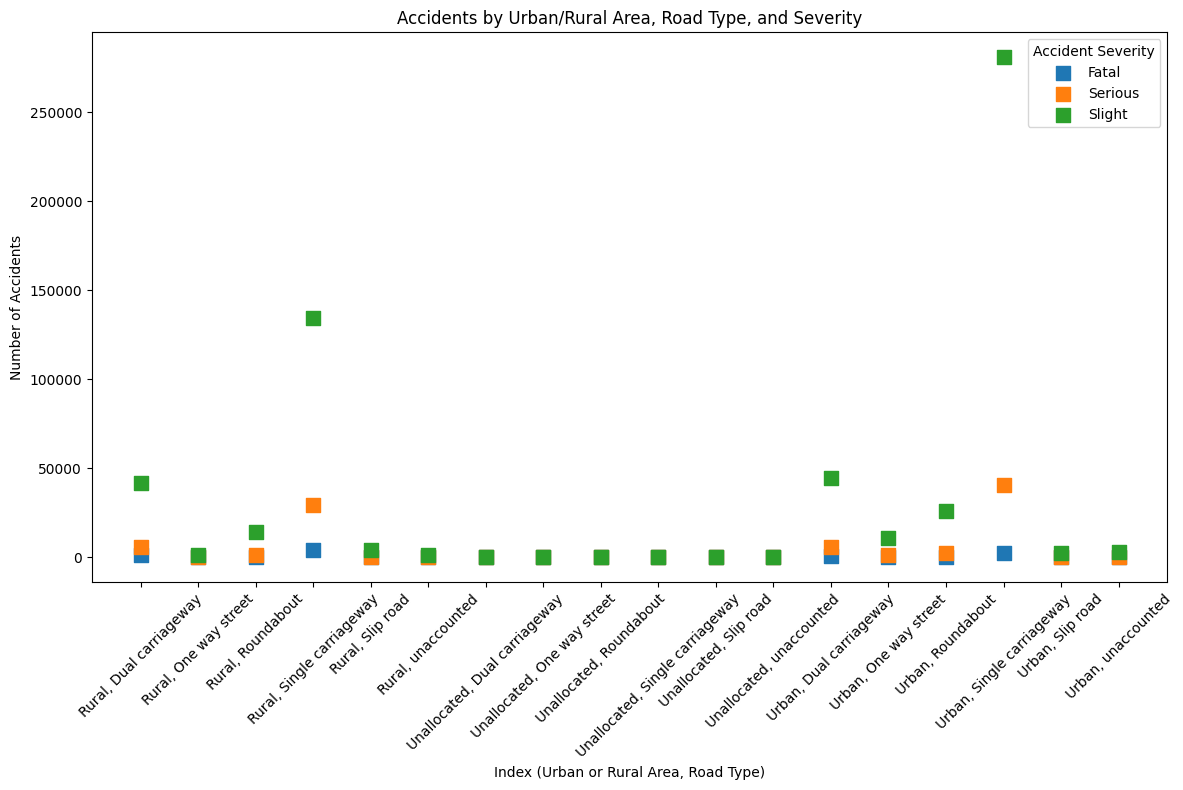

In [110]:
road_type_accidents = accident.groupby(['Urban_or_Rural_Area', 'Road_Type', 'Accident_Severity']).size().unstack().fillna(0)
road_type_accidents = road_type_accidents.reset_index()

plt.figure(figsize=(12,8))

for severity in road_type_accidents.columns[2:]:
    plt.scatter(
        road_type_accidents.index,
        road_type_accidents[severity],
        label=severity,
        marker='s',
        s=100,
    )

plt.title('Accidents by Urban/Rural Area, Road Type, and Severity')
plt.xlabel('Index (Urban or Rural Area, Road Type)')
plt.ylabel('Number of Accidents')
plt.xticks(ticks=range(len(road_type_accidents)), labels=[f"{row['Urban_or_Rural_Area']}, {row['Road_Type']}" for _, row in road_type_accidents.iterrows()], rotation=45)
plt.legend(title='Accident Severity')
plt.tight_layout()
plt.show()

<h1> Insight 6 </h1>
<h3>How do different lighting conditions (e.g., daylight, darkness with/without streetlights) impact accident severity? Are fatal accidents more common at night?</h3>

In [111]:
lighting_accidents = accident.groupby(['Light_Conditions', 'Accident_Severity'])['Accident_Severity'].count().unstack().fillna(0)
lighting_accidents

Accident_Severity,Fatal,Serious,Slight
Light_Conditions,,,
Darkness - lighting unknown,68,794,5622
Darkness - lights lit,1860,19130,108345
Darkness - lights unlit,45,360,2138
Darkness - no lighting,1612,7174,28651
Daylight,5076,60759,419045


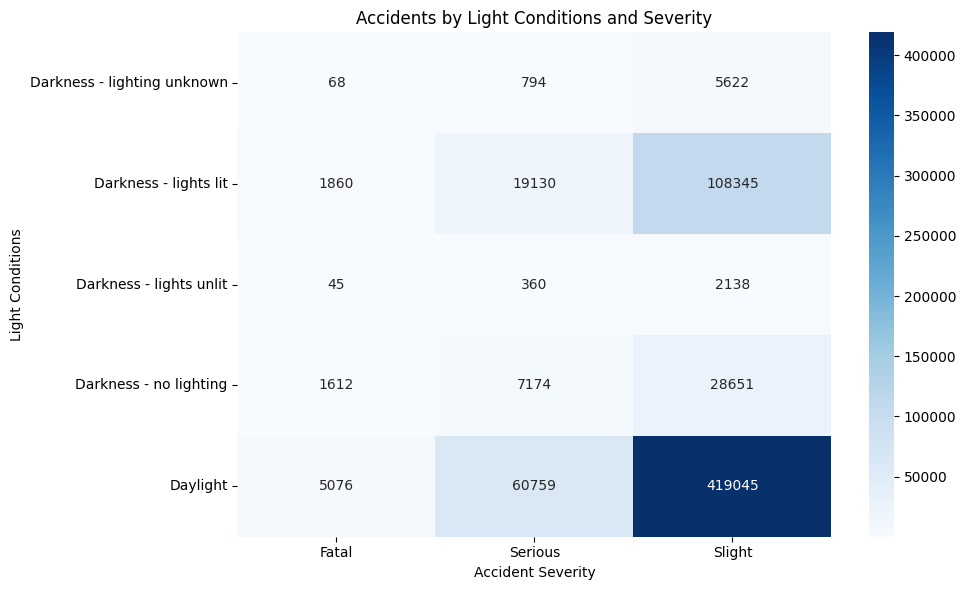

In [112]:
lighting_accidents = accident.groupby(['Light_Conditions', 'Accident_Severity'])['Accident_Severity'].count().unstack().fillna(0)

plt.figure(figsize=(10,6))
sns.heatmap(lighting_accidents, annot=True, cmap='Blues', fmt='g')
plt.title('Accidents by Light Conditions and Severity')
plt.ylabel('Light Conditions')
plt.xlabel('Accident Severity')
plt.tight_layout()
plt.show()

<h1> Insight 7 </h1>
<h3>How do different road surface conditions (e.g., wet, dry, icy) impact accident severity? Are severe accidents more frequent on slippery roads?</h3>

In [113]:
accidents_by_surface_severity = accident.groupby(['Road_Surface_Conditions', 'Accident_Severity']).size().reset_index(name='Accident_Count')
accidents_by_surface_severity

,Road_Surface_Conditions,Accident_Severity,Accident_Count
0,Dry,Fatal,5788
1,Dry,Serious,61638
2,Dry,Slight,380395
3,Flood over 3cm. deep,Fatal,23
4,Flood over 3cm. deep,Serious,152
5,Flood over 3cm. deep,Slight,842
6,Frost or ice,Fatal,193
7,Frost or ice,Serious,2007
8,Frost or ice,Slight,16317
9,Snow,Fatal,35


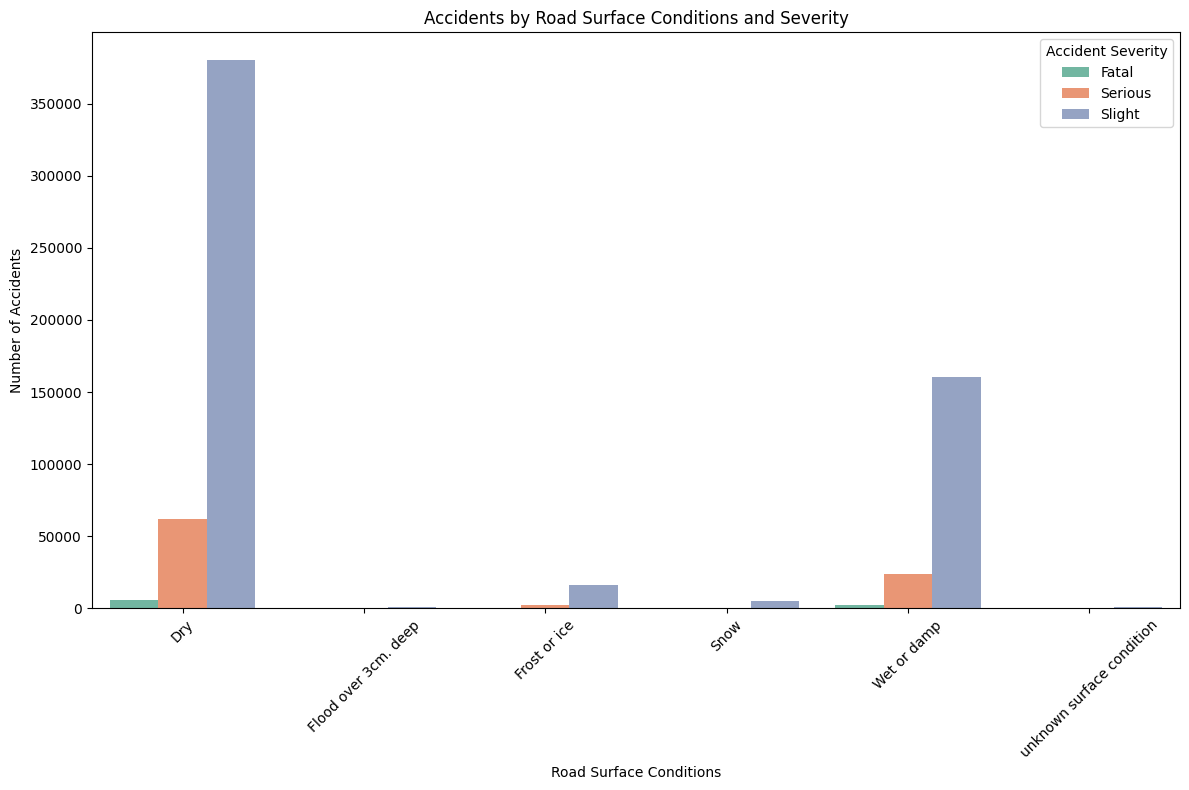

In [114]:
accidents_by_surface_severity = accident.groupby(['Road_Surface_Conditions', 'Accident_Severity']).size().reset_index(name='Accident_Count')

plt.figure(figsize=(12,8))
sns.barplot(x='Road_Surface_Conditions', y='Accident_Count', hue='Accident_Severity', data=accidents_by_surface_severity, palette='Set2')

plt.title('Accidents by Road Surface Conditions and Severity')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Accident Severity')
plt.show()


<h1> Insight 8 </h1>
<h3>How do different road surface conditions (e.g., wet, dry, icy) affect the number of accidents? Are accidents more frequent on slippery surfaces?</h3>

In [115]:
accidents_by_road_surface = accident.groupby(['Road_Surface_Conditions']).size().reset_index(name='Accident_Count')
accidents_by_road_surface

,Road_Surface_Conditions,Accident_Count
0,Dry,447821
1,Flood over 3cm. deep,1017
2,Frost or ice,18517
3,Snow,5890
4,Wet or damp,186708
5,unknown surface condition,726


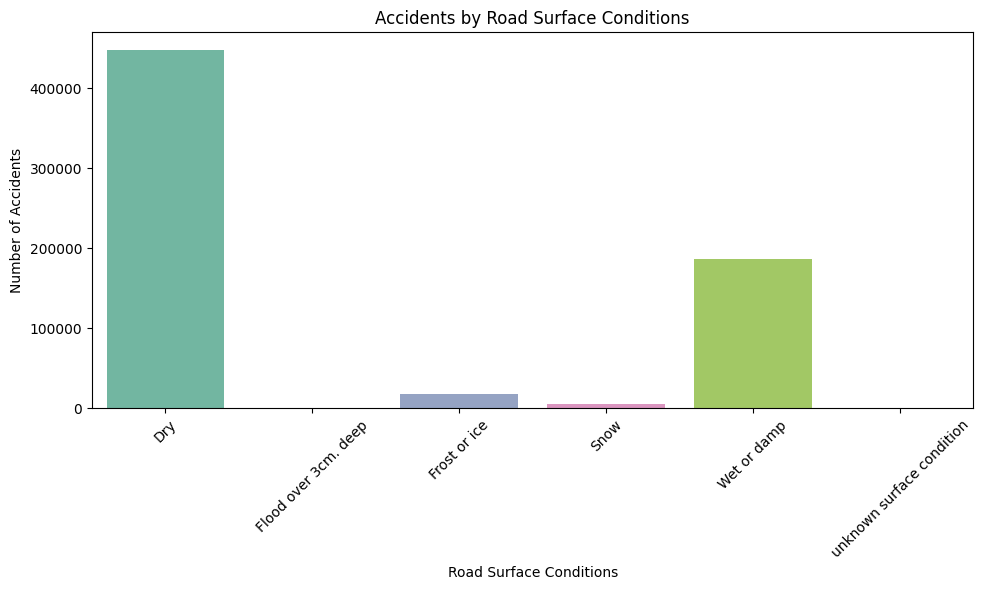

In [116]:
accidents_by_road_surface = accident.groupby(['Road_Surface_Conditions']).size().reset_index(name='Accident_Count')

plt.figure(figsize=(10,6))
sns.barplot(x='Road_Surface_Conditions', y='Accident_Count', data=accidents_by_road_surface, palette='Set2')

plt.title('Accidents by Road Surface Conditions')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h1> Insight 9 </h1>
<h3>The Relationship Between Light Conditions and Accident Severity </h3>


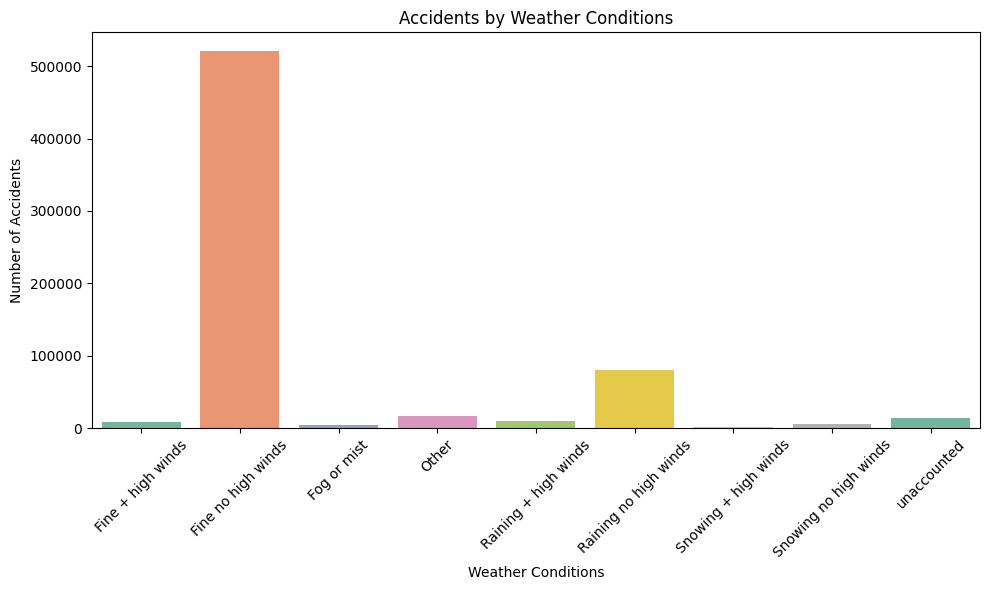

In [117]:
accidents_by_weather = accident.groupby('Weather_Conditions').size().reset_index(name='Accident_Count')

plt.figure(figsize=(10,6))
sns.barplot(x='Weather_Conditions', y='Accident_Count', data=accidents_by_weather, palette='Set2')

plt.title('Accidents by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

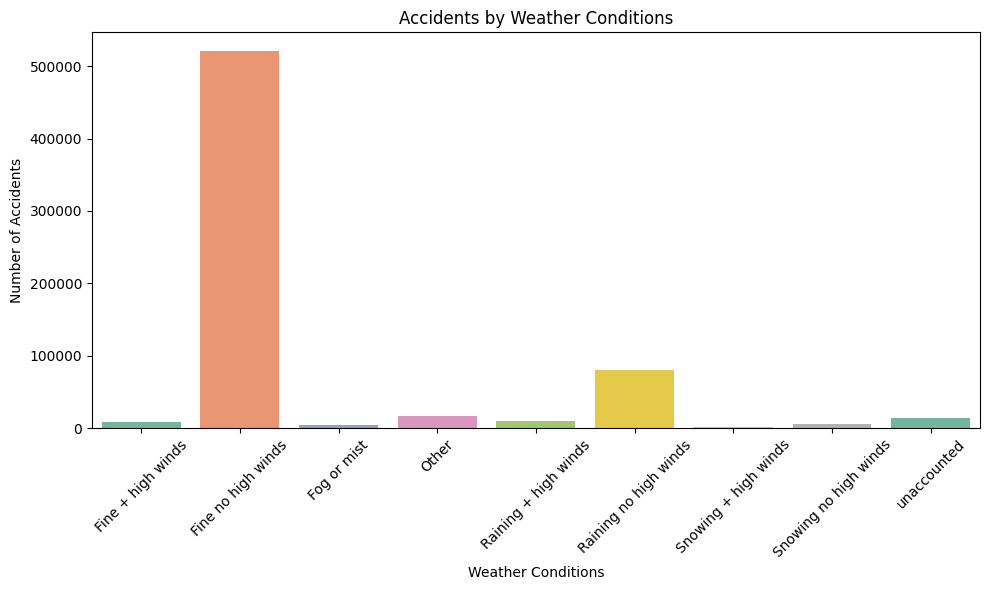

In [118]:
accidents_by_weather = accident.groupby('Weather_Conditions').size().reset_index(name='Accident_Count')

plt.figure(figsize=(10,6))
sns.barplot(x='Weather_Conditions', y='Accident_Count', data=accidents_by_weather, palette='Set2')

plt.title('Accidents by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h1> Insight 10 </h1>
<h3>Do accidents at night lead to more severe outcomes?</h3>
<h5></h5>

In [119]:
accidents_by_light = accident.groupby(['Light_Conditions', 'Accident_Severity']).size().reset_index(name='Accident_Count')
accidents_by_light

,Light_Conditions,Accident_Severity,Accident_Count
0,Darkness - lighting unknown,Fatal,68
1,Darkness - lighting unknown,Serious,794
2,Darkness - lighting unknown,Slight,5622
3,Darkness - lights lit,Fatal,1860
4,Darkness - lights lit,Serious,19130
5,Darkness - lights lit,Slight,108345
6,Darkness - lights unlit,Fatal,45
7,Darkness - lights unlit,Serious,360
8,Darkness - lights unlit,Slight,2138
9,Darkness - no lighting,Fatal,1612


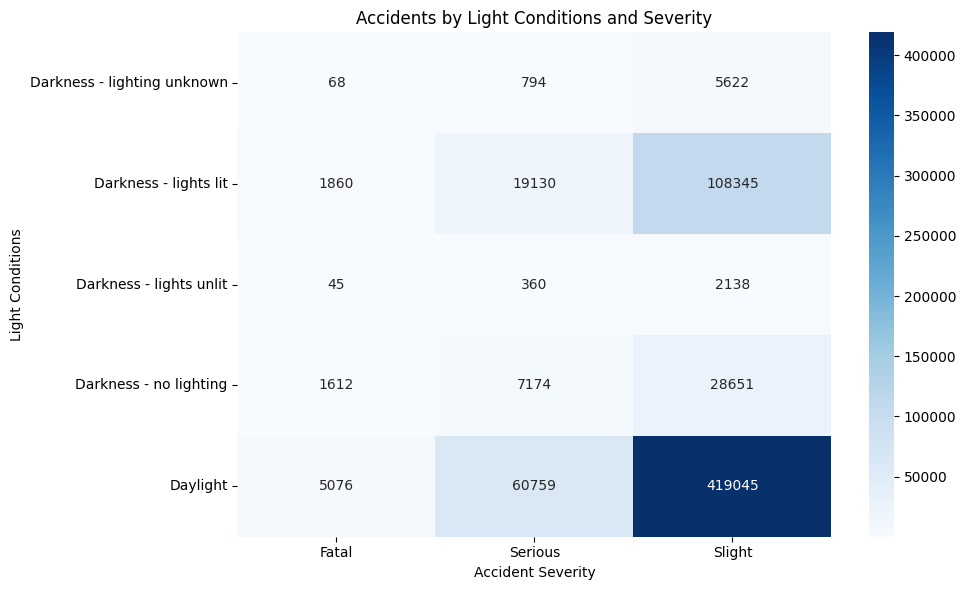

In [120]:
accidents_by_light = accident.groupby(['Light_Conditions', 'Accident_Severity']).size().reset_index(name='Accident_Count')
accidents_pivot = accidents_by_light.pivot_table(index='Light_Conditions', columns='Accident_Severity', values='Accident_Count')

plt.figure(figsize=(10,6))
sns.heatmap(accidents_pivot, annot=True, cmap='Blues', fmt='g', cbar=True)

plt.title('Accidents by Light Conditions and Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Light Conditions')
plt.tight_layout()
plt.show()

<h1> Insight 11 </h1>
<h3>What is the Correlation Between Road Type and Number of Casualties</h3>
<h5></h5>

In [121]:
accidents_by_surface = accident.groupby('Road_Surface_Conditions')['Accident_Severity'].count().reset_index()
accidents_by_surface = accidents_by_surface.sort_values('Accident_Severity', ascending=False)
print(accidents_by_surface)


     Road_Surface_Conditions  Accident_Severity
0                        Dry             447821
4                Wet or damp             186708
2               Frost or ice              18517
3                       Snow               5890
1       Flood over 3cm. deep               1017
5  unknown surface condition                726


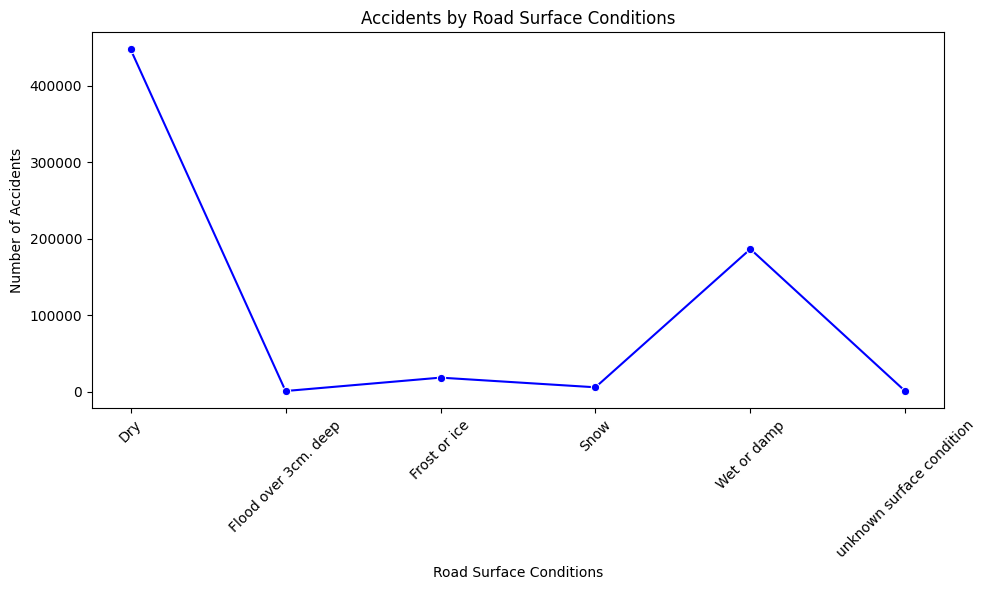

In [122]:
accidents_by_surface = accident.groupby('Road_Surface_Conditions')['Accident_Severity'].count().reset_index()
accidents_by_surface = accidents_by_surface.sort_values('Accident_Severity', ascending=False)

plt.figure(figsize=(10,6))
sns.lineplot(x='Road_Surface_Conditions', y='Accident_Severity', data=accidents_by_surface, marker='o', color='b')

plt.title('Accidents by Road Surface Conditions')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h1> Insight 12 </h1>
<h3> What is the Correlation Between Light Conditions and Accident Severity</h3>
<h5></h5>

In [123]:
light_severity_corr = accident.groupby('Light_Conditions').agg({'Accident_Severity': 'count'})
light_severity_corr['Severity_Index'] = light_severity_corr['Accident_Severity'] / light_severity_corr['Accident_Severity'].sum()
light_severity_corr.sort_values('Severity_Index', ascending=False)


,Accident_Severity,Severity_Index
Light_Conditions,,
Daylight,484880,0.733912
Darkness - lights lit,129335,0.195761
Darkness - no lighting,37437,0.056664
Darkness - lighting unknown,6484,0.009814
Darkness - lights unlit,2543,0.003849


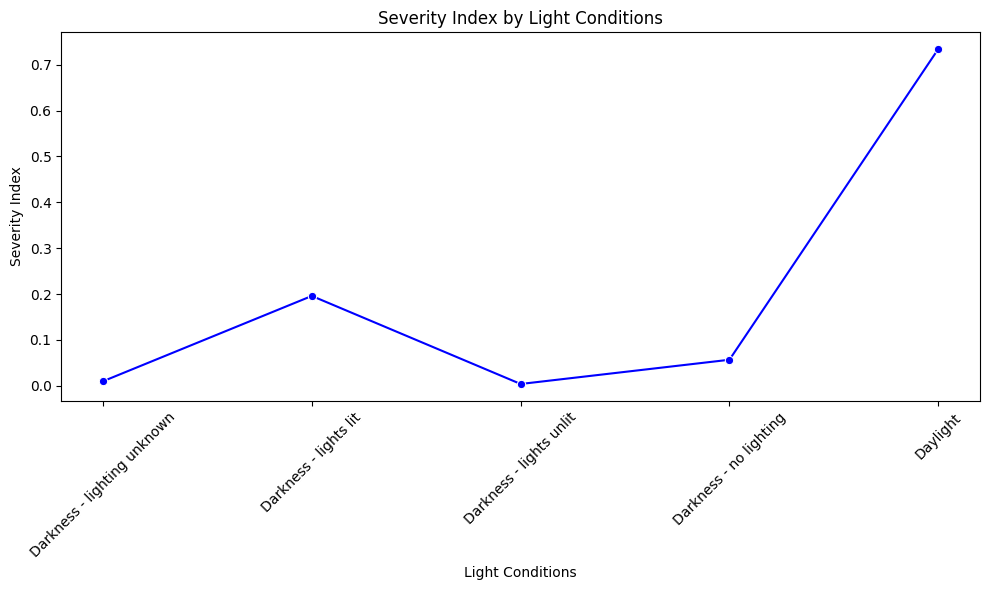

In [124]:
light_severity_corr = accident.groupby('Light_Conditions').agg({'Accident_Severity': 'count'})
light_severity_corr['Severity_Index'] = light_severity_corr['Accident_Severity'] / light_severity_corr['Accident_Severity'].sum()
light_severity_corr = light_severity_corr.sort_values('Severity_Index', ascending=False)

plt.figure(figsize=(10,6))
sns.lineplot(x=light_severity_corr.index, y='Severity_Index', data=light_severity_corr, marker='o', color='b')

plt.title('Severity Index by Light Conditions')
plt.xlabel('Light Conditions')
plt.ylabel('Severity Index')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h1> Insight 13 </h1>
<h3> Finding the Most Dangerous Combination of Weather and Road Conditions</h3>
<h5></h5>

In [125]:
weather_road_severity = accident.groupby(['Weather_Conditions', 'Road_Surface_Conditions']).agg({'Accident_Severity': 'count'})
weather_road_severity['Severity_Index'] = weather_road_severity['Accident_Severity'] / weather_road_severity['Accident_Severity'].sum()
weather_road_severity.sort_values('Severity_Index', ascending=False)


Accident_Severity  \
Weather_Conditions    Road_Surface_Conditions                        
Fine no high winds    Dry                                   427799   
                      Wet or damp                            81178   
Raining no high winds Wet or damp                            78087   
unaccounted           Dry                                    11223   
Fine no high winds    Frost or ice                           10653   
Other                 Wet or damp                             9366   
Raining + high winds  Wet or damp                             9184   
Fine + high winds     Dry                                     5023   
Other                 Frost or ice                            4718   
Snowing no high winds Snow                                    3659   
Fine + high winds     Wet or damp                             3311   
Other                 Dry                                     2628   
Fog or mist           Wet or damp                             2316   
unaccounted           Wet or damp                             1991   
Snowing no high winds Frost or ice                            1411   
                      Wet or damp                             1108   
Fine no high winds    Snow                                    1043   
Fog or mist           Frost or ice                             709   
unaccounted           unknown surface condition                612   
Snowing + high winds  Snow                                     549   
Raining no high winds Flood over 3cm. deep                     548   
                      Dry                                      547   
Fog or mist           Dry                                      471   
Other                 Snow                                     413   
Raining no high winds Frost or ice                             404   
Raining + high winds  Flood over 3cm. deep                     291   
unaccounted           Frost or ice                             225   
Fine + high winds     Frost or ice                             183   
Snowing + high winds  Wet or damp                              167   
                      Frost or ice                             162   
Fine no high winds    Flood over 3cm. deep                     113   
Raining no high winds Snow                                     106   
Fine no high winds    unknown surface condition                 99   
Raining + high winds  Dry                                       72   
unaccounted           Snow                                      58   
Snowing no high winds Dry                                       54   
Raining + high winds  Frost or ice                              52   
Fog or mist           Snow                                      27   
Other                 Flood over 3cm. deep                      19   
Fine + high winds     Snow                                      19   
unaccounted           Flood over 3cm. deep                      19   
Raining + high winds  Snow                                      16   
Fine + high winds     Flood over 3cm. deep                      15   
Other                 unknown surface condition                  6   
Snowing no high winds Flood over 3cm. deep                       6   
Raining no high winds unknown surface condition                  4   
Snowing + high winds  Dry                                        4   
                      Flood over 3cm. deep                       3   
Fine + high winds     unknown surface condition                  3   
Fog or mist           Flood over 3cm. deep                       3   
                      unknown surface condition                  2   
Raining + high winds  unknown surface condition                  0   
Snowing + high winds  unknown surface condition                  0   
Snowing no high winds unknown surface condition                  0   

                                                 Severity_Index  
Weather_Conditions    Road_Surface_Conditions                 

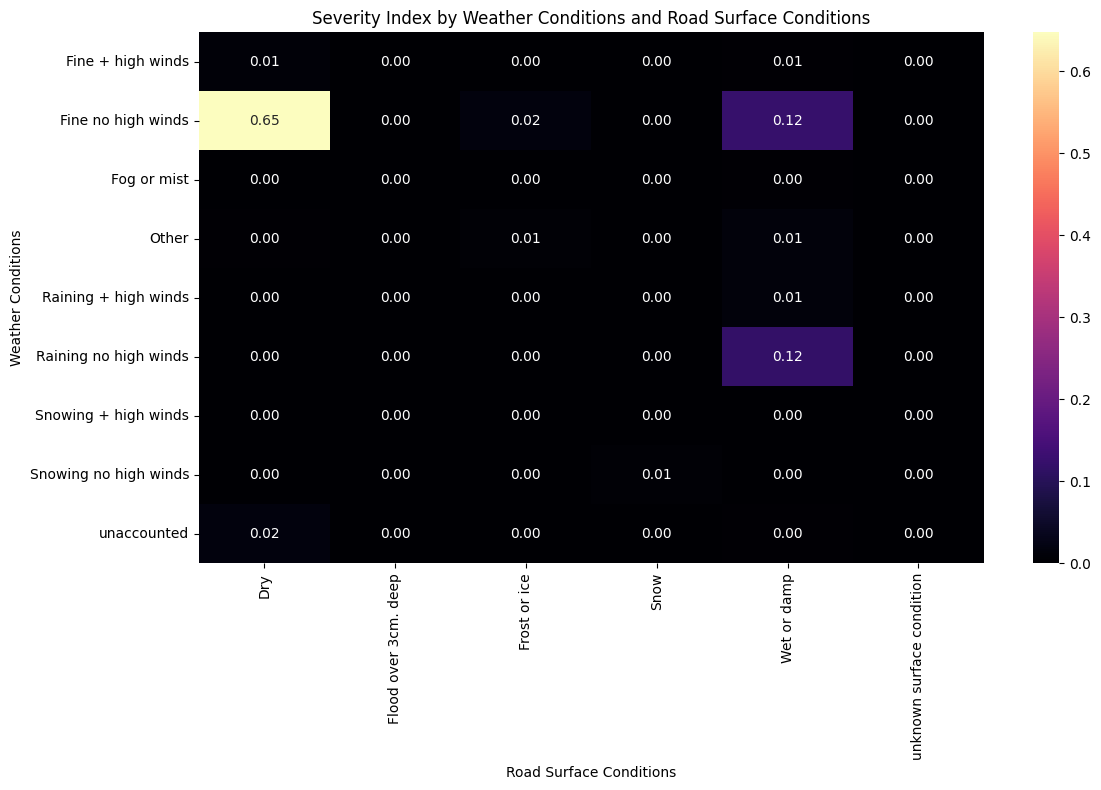

In [126]:
weather_road_severity = accident.groupby(['Weather_Conditions', 'Road_Surface_Conditions']).agg({'Accident_Severity': 'count'})
weather_road_severity['Severity_Index'] = weather_road_severity['Accident_Severity'] / weather_road_severity['Accident_Severity'].sum()
weather_road_severity = weather_road_severity.sort_values('Severity_Index', ascending=False)

weather_road_severity_pivot = weather_road_severity.pivot_table(index='Weather_Conditions', columns='Road_Surface_Conditions', values='Severity_Index')

plt.figure(figsize=(12,8))
sns.heatmap(weather_road_severity_pivot, annot=True, cmap='magma', fmt='.2f', cbar=True)

plt.title('Severity Index by Weather Conditions and Road Surface Conditions')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Weather Conditions')
plt.tight_layout()
plt.show()

<H1> Insight 14 </h1>
<h3> What is the impact of Weather Conditions on Accident Severity </h3>


In [127]:
accident['Number_of_Vehicles'] = pd.to_numeric(accident['Number_of_Vehicles'], errors='coerce')
vehicles_per_road = accident.groupby('Road_Type', as_index=False)['Number_of_Vehicles'].mean()
vehicles_per_road = vehicles_per_road.sort_values('Number_of_Vehicles', ascending=False)
print(vehicles_per_road)



            Road_Type  Number_of_Vehicles
0    Dual carriageway            2.009766
4           Slip road            1.917483
2          Roundabout            1.901323
3  Single carriageway            1.795911
5         unaccounted            1.674115
1      One way street            1.585441


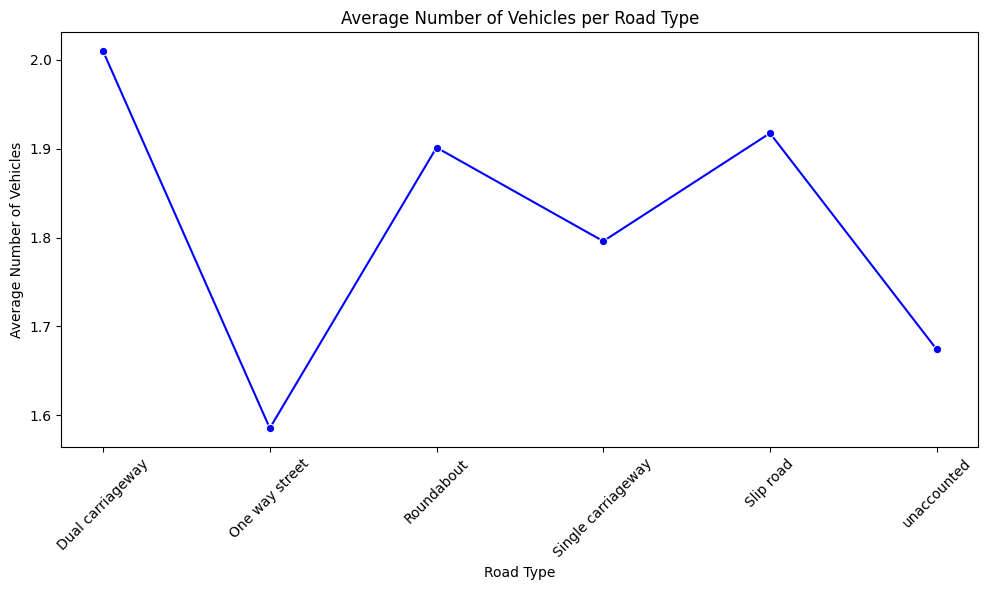

In [128]:
accident['Number_of_Vehicles'] = pd.to_numeric(accident['Number_of_Vehicles'], errors='coerce')
vehicles_per_road = accident.groupby('Road_Type', as_index=False)['Number_of_Vehicles'].mean()
vehicles_per_road = vehicles_per_road.sort_values('Number_of_Vehicles', ascending=False)

plt.figure(figsize=(10,6))
sns.lineplot(x='Road_Type', y='Number_of_Vehicles', data=vehicles_per_road, marker='o', color='b')

plt.title('Average Number of Vehicles per Road Type')
plt.xlabel('Road Type')
plt.ylabel('Average Number of Vehicles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h1> Insight 15</h1>
<h3>Severity Trends Over the Years (Time Series Analysis)</h3>
<h5></h5>

In [129]:
accident['Year'] = accident['Accident Date'].dt.year
severity_trend = accident.groupby('Year')['Accident_Severity'].value_counts(normalize=True).unstack()
severity_trend

Accident_Severity,Fatal,Serious,Slight
Year,,,
2019,0.014903,0.133553,0.851544
2020,0.013723,0.135535,0.850742
2021,0.012577,0.134494,0.852929
2022,0.010726,0.130018,0.859257


<Figure size 1200x600 with 0 Axes>

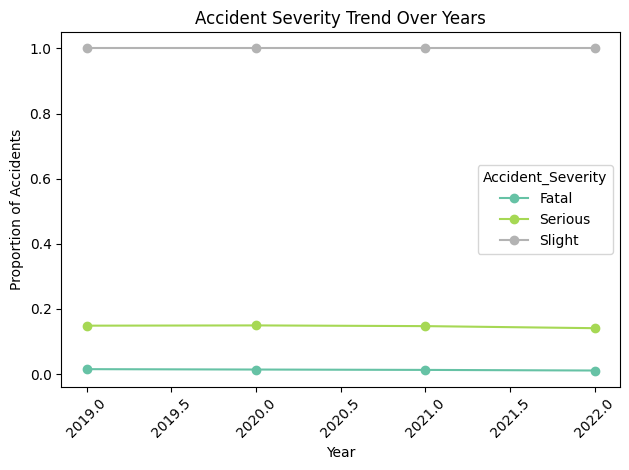

In [130]:
accident['Year'] = accident['Accident Date'].dt.year
severity_trend = accident.groupby('Year')['Accident_Severity'].value_counts(normalize=True).unstack()

plt.figure(figsize=(12,6))
severity_trend.plot(kind='line', stacked=True, marker='o', colormap='Set2')

plt.title('Accident Severity Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Proportion of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h1> Insight 16</h1>
<h3>Seasonal Accident Trends</h3>
<h5></h5>

In [131]:
accident['Month'] = accident['Accident Date'].dt.month
seasonal_trends = accident.groupby('Month').size().reset_index(name='Accident_Count')
seasonal_trends

,Month,Accident_Count
0,1,52872
1,2,49491
2,3,54086
3,4,51744
4,5,56352
5,6,56481
6,7,57445
7,8,53913
8,9,56455
9,10,59580


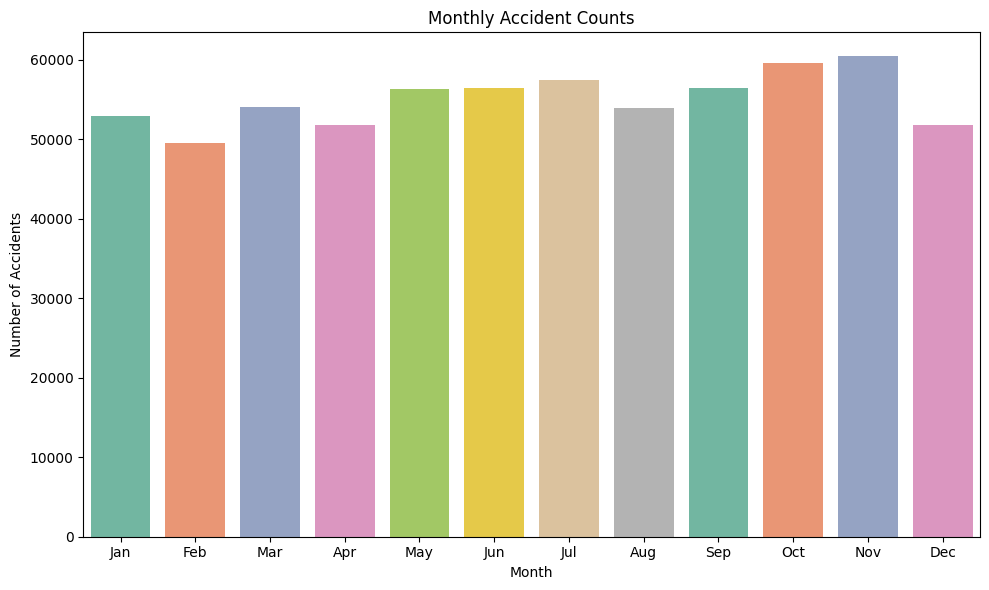

In [132]:
accident['Month'] = accident['Accident Date'].dt.month
seasonal_trends = accident.groupby('Month').size().reset_index(name='Accident_Count')

plt.figure(figsize=(10,6))
sns.barplot(x='Month', y='Accident_Count', data=seasonal_trends, palette='Set2')

plt.title('Monthly Accident Counts')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

<h1> Insight 17</h1>
<h3>Do Accidents Spike at the End of the Month?</h3>
<h5></h5>

In [133]:
accident['Day'] = accident['Accident Date'].dt.day
end_of_month_accidents = accident[accident['Day'] >= 25].groupby('Day').size().reset_index(name='Accident_Count')
end_of_month_accidents

,Day,Accident_Count
0,25,19949
1,26,21168
2,27,21038
3,28,20707
4,29,20138
5,30,19573
6,31,11816


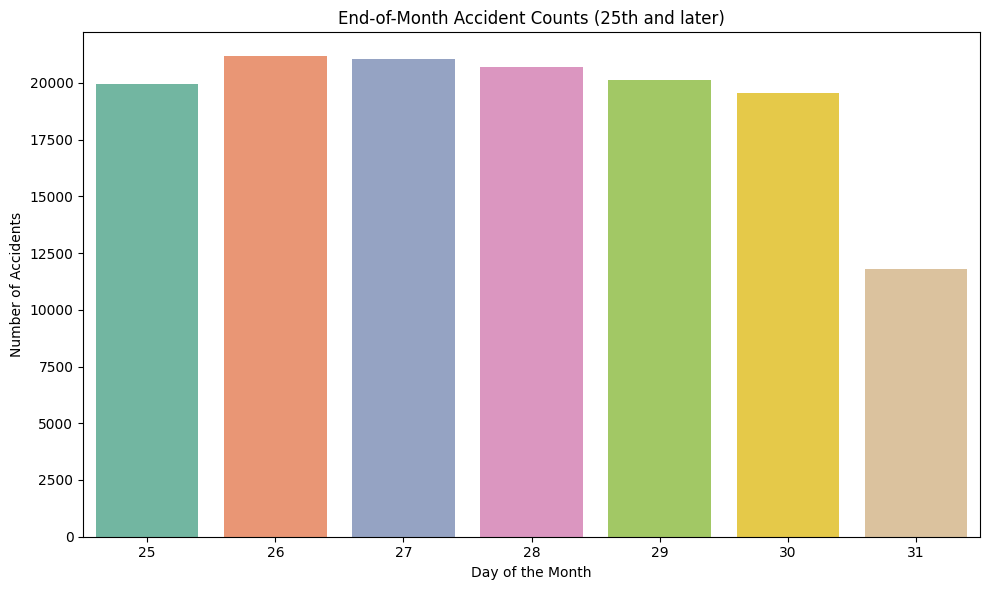

In [134]:
accident['Day'] = accident['Accident Date'].dt.day
end_of_month_accidents = accident[accident['Day'] >= 25].groupby('Day').size().reset_index(name='Accident_Count')

plt.figure(figsize=(10,6))
sns.barplot(x='Day', y='Accident_Count', data=end_of_month_accidents, palette='Set2')

plt.title('End-of-Month Accident Counts (25th and later)')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

<h1> Insight 18</h1>
<h3> Trend of Fatal Accidents vs. Non-Fatal Accidents Over Time</h3>
<h5></h5>

In [135]:
fatal_vs_nonfatal = accident.groupby(['Year', 'Accident_Severity']).size().unstack().reset_index()
fatal_vs_nonfatal['Fatal_Percentage'] = (fatal_vs_nonfatal['Fatal'] / fatal_vs_nonfatal.sum(axis=1)) * 100
fatal_vs_nonfatal


Accident_Severity,Year,Fatal,Serious,Slight,Fatal_Percentage
0,2019,2714,24322,155079,1.473927
1,2020,2341,23121,145129,1.356229
2,2021,2057,21997,139500,1.242337
3,2022,1549,18777,124093,1.057764


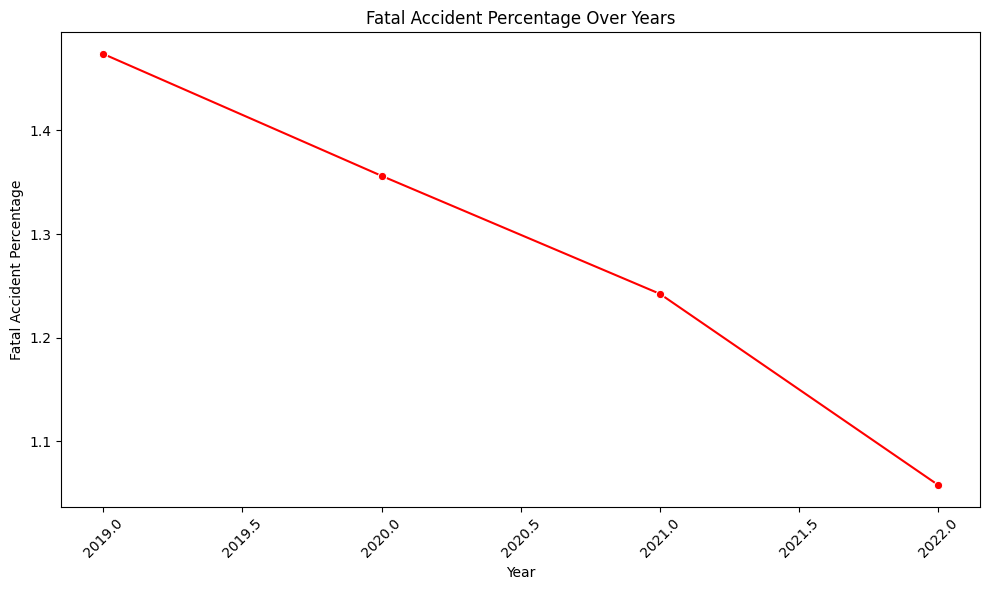

In [136]:
fatal_vs_nonfatal = accident.groupby(['Year', 'Accident_Severity']).size().unstack().reset_index()
fatal_vs_nonfatal['Fatal_Percentage'] = (fatal_vs_nonfatal['Fatal'] / fatal_vs_nonfatal.sum(axis=1)) * 100

plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='Fatal_Percentage', data=fatal_vs_nonfatal, marker='o', color='r')

plt.title('Fatal Accident Percentage Over Years')
plt.xlabel('Year')
plt.ylabel('Fatal Accident Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h1> Insight 19</h1>
<h3>Long-Term Impact of Weather Conditions on Accidents</h3>


In [137]:
weather_trend = accident.groupby(['Year', 'Weather_Conditions']).size().reset_index(name='Accident_Count')
weather_trend

,Year,Weather_Conditions,Accident_Count
0,2019,Fine + high winds,2545
1,2019,Fine no high winds,143876
2,2019,Fog or mist,857
3,2019,Other,4083
4,2019,Raining + high winds,2959
5,2019,Raining no high winds,22835
6,2019,Snowing + high winds,146
7,2019,Snowing no high winds,680
8,2019,unaccounted,4134
9,2020,Fine + high winds,2861


<Figure size 1200x600 with 0 Axes>

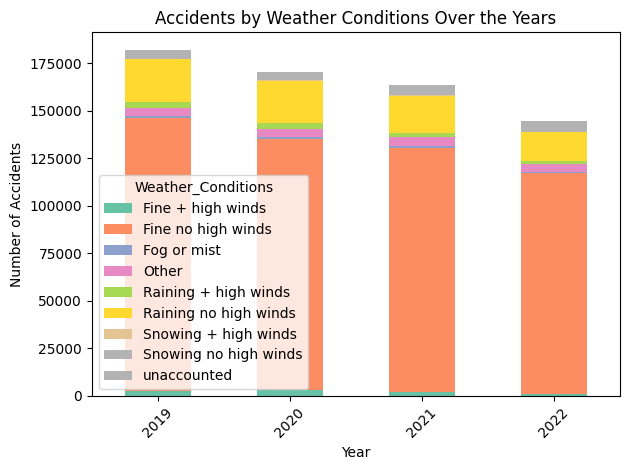

In [138]:
weather_trend = accident.groupby(['Year', 'Weather_Conditions']).size().reset_index(name='Accident_Count')
weather_trend_pivot = weather_trend.pivot_table(index='Year', columns='Weather_Conditions', values='Accident_Count', aggfunc='sum')

plt.figure(figsize=(12,6))
weather_trend_pivot.plot(kind='bar', stacked=True, colormap='Set2')

plt.title('Accidents by Weather Conditions Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h1> Insight 20</h1>
<h3> What is the Correlation Between Weather and Severe Accidents</h3>


In [139]:
weather_severity = accident.groupby(['Weather_Conditions', 'Accident_Severity']).size().unstack().reset_index()
weather_severity

Accident_Severity,Weather_Conditions,Fatal,Serious,Slight
0,Fine + high winds,175,1245,7134
1,Fine no high winds,7100,72046,441739
2,Fog or mist,82,483,2963
3,Other,165,1801,15184
4,Raining + high winds,145,1261,8209
5,Raining no high winds,848,9468,69380
6,Snowing + high winds,3,109,773
7,Snowing no high winds,36,565,5637
8,unaccounted,107,1239,12782


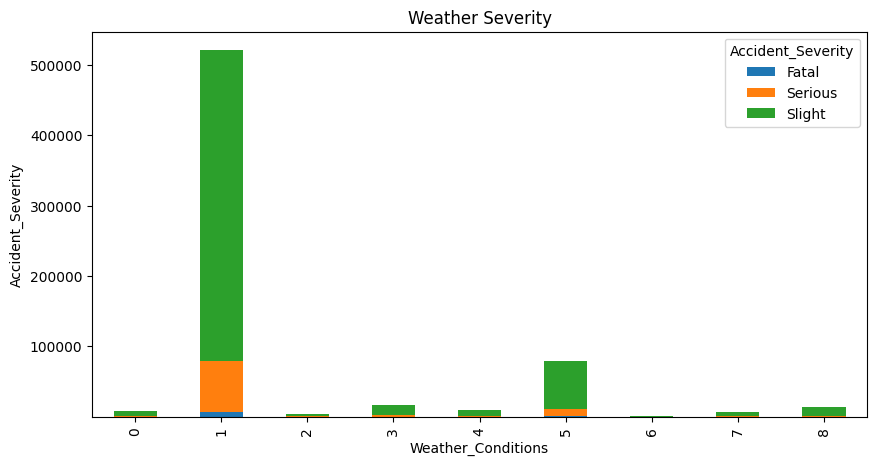

In [140]:
weather_severity.plot(kind='bar', stacked=True)
plt.title('Weather Severity')
plt.xlabel('Weather_Conditions')
plt.ylabel('Accident_Severity')
plt.gcf().set_size_inches(10,5)
plt.show()

<h1>Area Analysis</h1>

In [141]:
area_year = accident.groupby(['District Area',"Year"]).size().reset_index(name="Accident_Count")
pivot_table = area_year.pivot(index = 'Year', columns = 'District Area', values = 'Accident_Count')

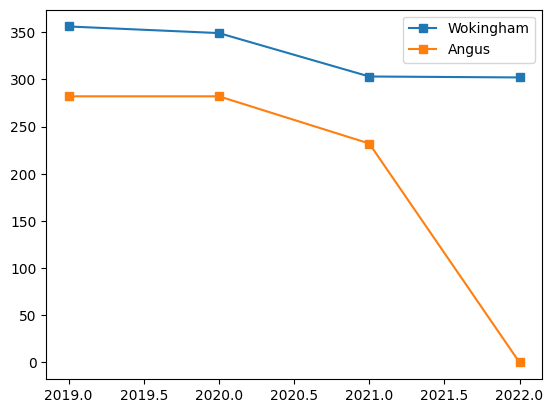

In [142]:
plt.plot(pivot_table.index,pivot_table['Wokingham'], label = 'Wokingham', marker='s')
plt.plot(pivot_table.index,pivot_table['Angus'], label = 'Angus', marker = 's')
plt.legend()
plt.show()

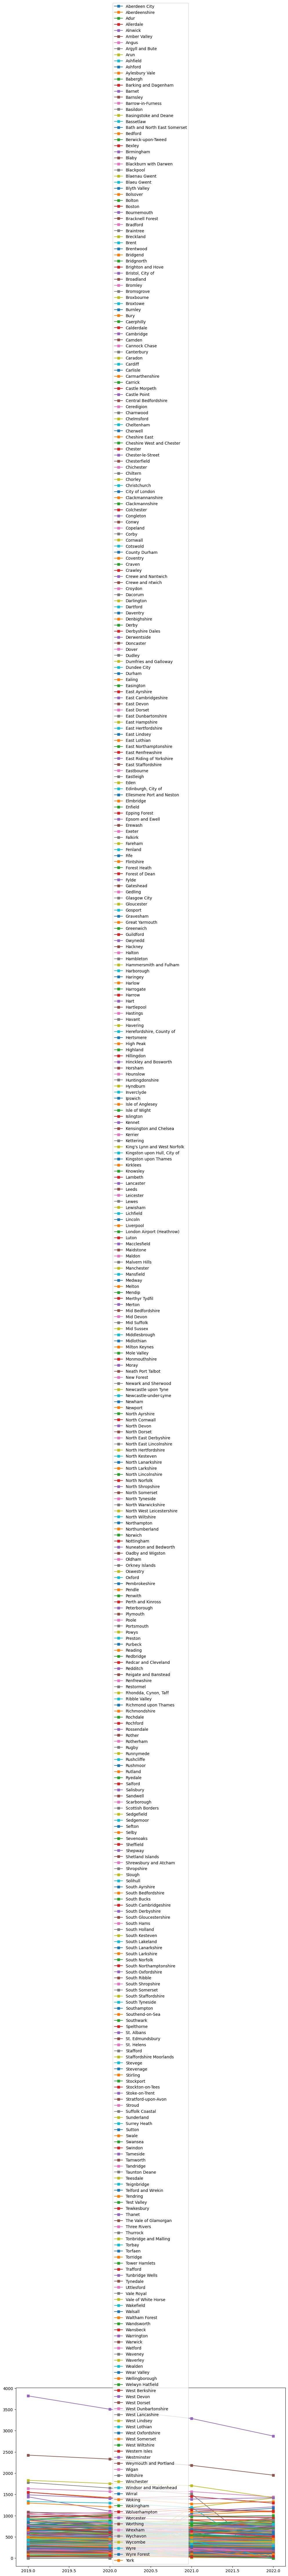

In [143]:
for x in pivot_table:
    plt.plot(pivot_table.index,pivot_table[x], label = x, marker = 's')

plt.gcf().set_size_inches(12, 8)
plt.legend()
plt.show()


AttributeError: 'Figure' object has no attribute 'set_sizes_inches'

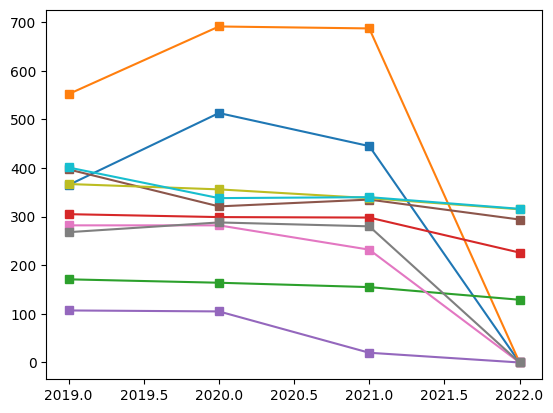

In [144]:
count = 0
for x in pivot_table:
    count += 1
    plt.plot(pivot_table.index,pivot_table[x], label = x, marker='s')
    if count == 10:
        break

plt.gcf().set_sizes_inches(13,8)
plt.legend()
plt.show()


<h1> Visual Correlation </h1>

In [ ]:
type_vh = accident.groupby(['Road_Type', 'Vehicle_Type']).size().unstack()

sns.heatmap(type_vh, cmap='crest')
plt.show()